In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/language-identification-datasst/dataset.csv


In [4]:
import numpy as np # linear algerbra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import json # data processing(.json)

from sklearn.preprocessing import LabelEncoder # Creates placeholders for categorical variables
from sklearn.feature_extraction.text import CountVectorizer # converts text into vector matrix
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.naive_bayes import MultinomialNB # ML model for naive bayes
from sklearn.metrics import accuracy_score, confusion_matrix # measure the accuracy of the model
from sklearn.metrics import classification_report # classification report of the model

In [5]:
import re # NLP
import nltk # natural langauge processing
from nltk.tokenize import word_tokenize # tokenizer
from nltk.stem import PorterStemmer # stemmer
from nltk.corpus import stopwords # stopwords

from wordcloud import WordCloud # create word cloud images of text


import tensorflow as tf # create neural networks
from tensorflow.keras import Sequential # create squential NN model
from tensorflow.keras.layers import Dense # implements the operation: output = activation(dot(input, kernel) + bias)
from tensorflow.keras.utils import plot_model # plot model architecture
from tensorflow.keras.callbacks import EarlyStopping # early stopping of training
from tensorflow.keras.models import load_model # load saved model

from sklearn.model_selection import GridSearchCV # hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV # hyperparameter optimization
from tensorflow.keras.models import Sequential

 # linking keras model to sklearn

%matplotlib inline 
# With this backend, the output of plotting commands is displayed inline within frontends
# like the Jupyter notebook, directly below the code cell that produced it. The resulting 
# plots will then also be stored in the notebook document

2024-04-02 13:44:45.090966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 13:44:45.091059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 13:44:45.222115: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


loading the data
WiLI-2018, the Wikipedia language identification benchmark dataset, contains 235000 paragraphs of 235 languages. Each language in this dataset contains 1000 rows/paragraphs.

We use a dataset that contains 22 selective languages from the original dataset which includes the following Languages

English
Arabic
French
Hindi
Urdu
Portuguese
Persian
Pushto
Spanish
Korean
Tamil
Turkish
Estonian
Russian
Romanian
Chinese
Swedish
Latin
Indonesian
Dutch
Japanese
Thai
Dataset: https://www.kaggle.com/zarajamshaid/language-identification-datasst

In [6]:
# read dataset which in .csv format

data = pd.read_csv('/kaggle/input/language-identification-datasst/dataset.csv', encoding='utf-8').copy() # creates a dataframe of a copy of the dataset
                                                           # utf-8 encoding use to be able to read text in other langauge
print(data.shape)  # shape of the dataset
data.head()        # first 5 rows of the dataset

(22000, 2)


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [7]:
data.tail() # last 5 rows of the dataset

,Text,language
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
21999,aprilie sonda spațială messenger a nasa și-a ...,Romanian


In [8]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [9]:
data.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


In [10]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [11]:
data['language'].unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [12]:
# checking the datatype of the features

data.dtypes

Text        object
language    object
dtype: object

In [13]:
# number of of samples per language (category)

data['language'].value_counts()

language
Estonian      1000
Swedish       1000
Thai          1000
Tamil         1000
Dutch         1000
Japanese      1000
Turkish       1000
Latin         1000
Urdu          1000
Indonesian    1000
Portugese     1000
French        1000
Chinese       1000
Korean        1000
Hindi         1000
Spanish       1000
Pushto        1000
Persian       1000
Romanian      1000
Russian       1000
English       1000
Arabic        1000
Name: count, dtype: int64

In [14]:
# dropping duplicate samples

data = data.drop_duplicates(subset='Text')
data = data.reset_index(drop=True)

In [15]:
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21854,hors du terrain les années et sont des année...,French
21855,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21856,con motivo de la celebración del septuagésimoq...,Spanish
21857,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [16]:
# rechecking the number of samples per language

data['language'].value_counts()

language
Japanese      1000
Thai          1000
Korean        1000
Chinese       1000
Urdu          1000
Turkish       1000
Romanian      1000
English       1000
Persian       1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Dutch          996
Spanish        996
Pushto         993
Swedish        992
French         990
Hindi          990
Tamil          981
Indonesian     975
Latin          953
Name: count, dtype: int64

In [17]:
# languages stopwords supported by NLTK

print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [18]:
# adding nonalphanumeric char to stopwords

nonalphanumeric = ['\'', '.', ',', '\"', ':', ';', '!', '@', '#', '$', '%', '^', '&',
                 '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', '\\', '?', 
                 '/','>', '<', '|', ' '] 

stopwords = nonalphanumeric

In [19]:
# total stop words

len(stopwords)


31

In [22]:
def clean_text(text):
    """
    takes text as input and returns cleaned text after tokenization, 
    stopwords removal and stemming
    """
    tokens = word_tokenize(text) # creates text into list of words
    words = [word.lower() for word in tokens if word not in stopwords] # creates a list with words which are not stopwords
    words = [PorterStemmer().stem(word) for word in words] # stems(remove suffixes and prefixes)  words
    return " ".join(words) # joins the list of cleaned words into a sentence string

In [25]:
# applying clean_text function to all rows in 'Text' column 

data['clean_text'] = data['Text'].apply(clean_text)

In [26]:
# using LabelEncoder to get placeholder number values for categorical variabel 'language'

le = LabelEncoder()
data['language_encoded'] = le.fit_transform(data['language'])
data.head()

,Text,language,clean_text,language_encoded
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameer ning pai...,4
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebe joseph pereira thoma på eng the jesuit an...,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,18
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spon behoort tot het geslacht haliclona en ...,2


In [27]:
# list of languages encoded with thier respective indices representing their placeholder numbers

lang_list = [i for i in range(22)]
lang_list = le.inverse_transform(lang_list)
lang_list = lang_list.tolist()
lang_list

['Arabic',
 'Chinese',
 'Dutch',
 'English',
 'Estonian',
 'French',
 'Hindi',
 'Indonesian',
 'Japanese',
 'Korean',
 'Latin',
 'Persian',
 'Portugese',
 'Pushto',
 'Romanian',
 'Russian',
 'Spanish',
 'Swedish',
 'Tamil',
 'Thai',
 'Turkish',
 'Urdu']

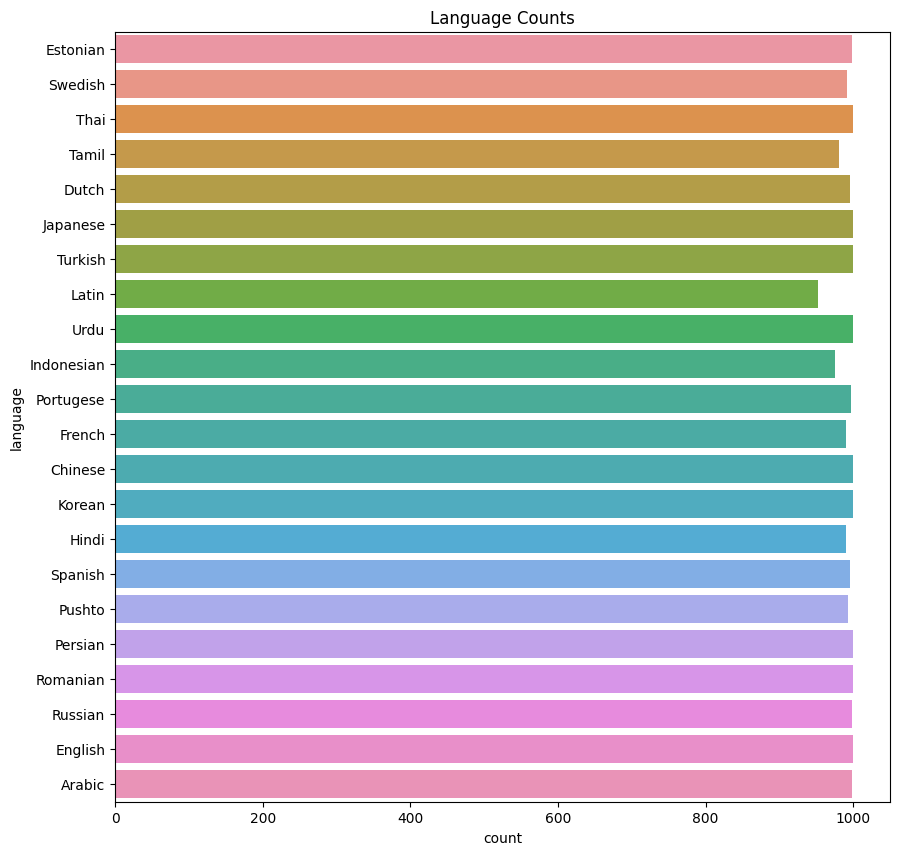

In [28]:
# plotting a language-wise freqeuncy distribtion for number of samples in each language 

plt.figure(figsize=(10,10))
plt.title('Language Counts')
ax = sns.countplot(y=data['language'], data=data)
plt.show()

In [29]:
def remove_english(text):
    """
    function that takes text as input and returns text without english words
    """
    pat = "[a-zA-Z]+"
    text = re.sub(pat, "", text)
    return text

In [30]:
data_Chinese = data[data['language']=='Chinese'] # Chinese data in dataset

clean_text = data.loc[data.language=='Chinese']['clean_text']
clean_text = clean_text.apply(remove_english) # removing english words

data_Chinese.loc[:,'clean_text'] = clean_text

In [33]:
# removing old chinese text and appending new cleaned chinese text

data.drop(data[data['language']=='Chinese'].index, inplace=True, axis=0)

In [34]:
import pandas as pd
# Append the data_Chinese DataFrame to the main data DataFrame using pd.concat()
data = pd.concat([data, data_Chinese])


In [35]:
# shuffling dataframe and resetting index

data =data.sample(frac=1).reset_index(drop=True)

In [36]:
# defining input variable
# vectorizing input varible 'clean_text' into a matrix 

x = data['clean_text']

cv = CountVectorizer() # ngram_range=(1,2)
x = cv.fit_transform(x)

# changing the datatype of the number into uint8 to consume less memory
x = x.astype('uint8') # uint8 and float32

In [37]:
# defining target variable

y = data['language_encoded']

In [38]:
# splitting data into training and testing datasets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

Creating a Naive Bayes model¶
We create a baseline model to compare our Multilayer Perceptron Neural Network against.

MultinomialNB is suitable for classification with discrete features and hence works well with our given dataset

In [39]:
# fitting the Multinomial Naive Bayes model

NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)

MultinomialNB()

In [40]:
# fitting the Multinomial Naive Bayes model

NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)

MultinomialNB()

In [41]:
# predicting using the naive bayes model

y_pred = NB_model.predict(x_test)

In [42]:
# accuracy of the naive bayes model

accuracy_score(y_test, y_pred)

0.9606587374199451

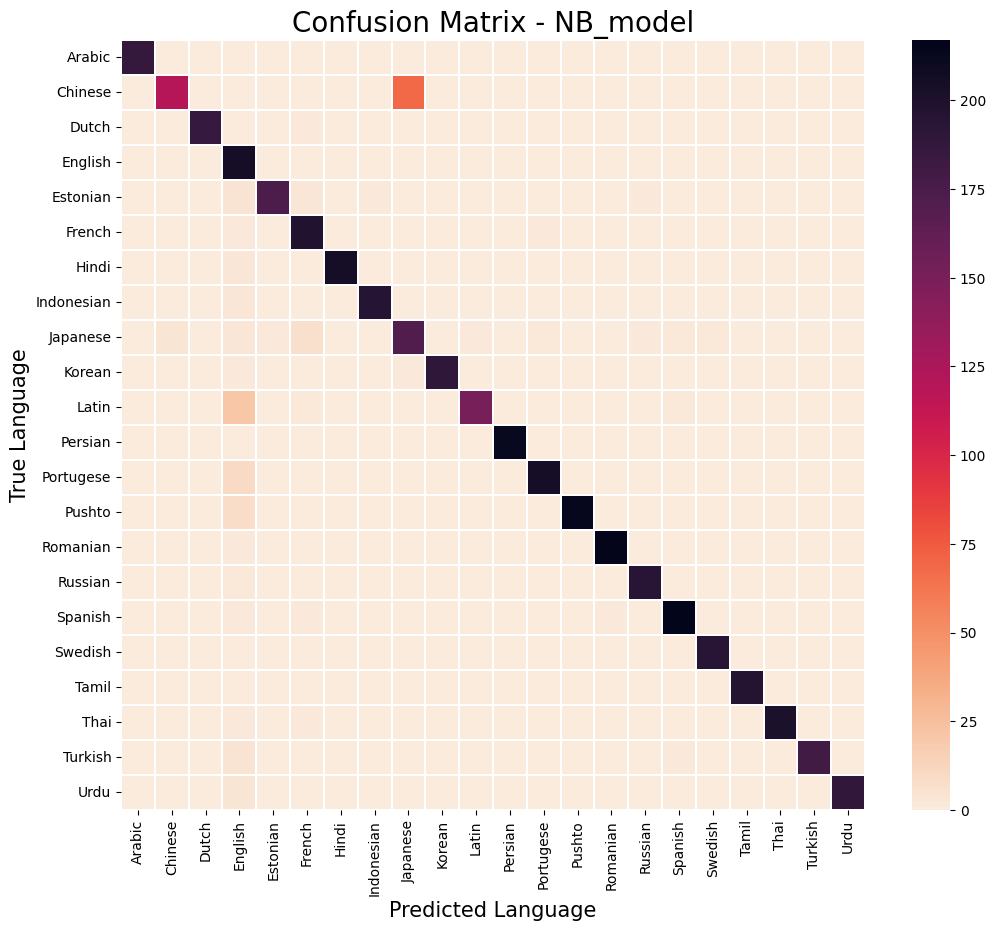

In [45]:
# creating confusion matrix heatmap 

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - NB_model', fontsize=20)
sns.heatmap(cm, xticklabels=lang_list, yticklabels=lang_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       0.97      0.64      0.77       189
           2       1.00      0.99      1.00       187
           3       0.75      1.00      0.86       205
           4       0.99      0.95      0.97       183
           5       0.93      0.99      0.96       200
           6       1.00      0.99      0.99       208
           7       0.99      0.98      0.99       198
           8       0.71      0.89      0.79       194
           9       1.00      0.99      0.99       192
          10       0.99      0.86      0.92       176
          11       1.00      1.00      1.00       212
          12       0.99      0.95      0.97       215
          13       1.00      0.96      0.98       222
          14       1.00      1.00      1.00       217
          15       0.99      0.99      0.99       196
          16       0.98      0.99      0.98       220
          17       0.99    

In [47]:
# converting csr matrix into np.ndarray supported by tensorflow

x_train = x_train.toarray()
x_test = x_test.toarray()

In [48]:
# shapes of the various datasets

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17487, 264258) (4372, 264258) (17487,) (4372,)


In [49]:
# input size hyperparameter

INPUT_SIZE = x_train.shape[1]
INPUT_SIZE

264258

In [50]:
# outputsize hyperparatmeter

OUTPUT_SIZE = len(data['language_encoded'].unique())
OUTPUT_SIZE

22

In [51]:
# epochs and batch_size hyperparameters

EPOCHS = 10
BATCH_SIZE = 128

In [60]:
# creating the MLP model

model = Sequential([
    Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(INPUT_SIZE,)),
    Dense(80, activation='relu', kernel_initializer='he_normal'),
    Dense(50, activation='relu', kernel_initializer='he_normal'),
    Dense(OUTPUT_SIZE, activation='softmax')
])

In [61]:
model = Sequential([
    Input(shape=(INPUT_SIZE,)),  # Define the input shape using the Input layer
    Dense(100, activation='relu', kernel_initializer='he_normal'),
    Dense(80, activation='relu', kernel_initializer='he_normal'),
    Dense(50, activation='relu', kernel_initializer='he_normal'),
    Dense(OUTPUT_SIZE, activation='softmax')
])

In [62]:
from keras.models import Sequential
from keras.layers import Input, Dense

model = Sequential([
    Input(shape=(INPUT_SIZE,)),  # Define the input shape using the Input layer
    Dense(100, activation='relu', kernel_initializer='he_normal'),
    Dense(80, activation='relu', kernel_initializer='he_normal'),
    Dense(50, activation='relu', kernel_initializer='he_normal'),
    Dense(OUTPUT_SIZE, activation='softmax')
])


In [63]:
# compiling the MLP model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
# fitting the MLP model

hist = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.3, verbose=2)

Epoch 1/10


W0000 00:00:1712067063.821329      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712067070.124257      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


96/96 - 9s - 94ms/step - accuracy: 0.8684 - loss: 0.9918 - val_accuracy: 0.9611 - val_loss: 0.1975
Epoch 2/10


W0000 00:00:1712067071.040406      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


96/96 - 3s - 31ms/step - accuracy: 0.9952 - loss: 0.0355 - val_accuracy: 0.9666 - val_loss: 0.1381
Epoch 3/10
96/96 - 3s - 30ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9630 - val_loss: 0.1329
Epoch 4/10
96/96 - 3s - 30ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9613 - val_loss: 0.1358
Epoch 5/10
96/96 - 3s - 30ms/step - accuracy: 1.0000 - loss: 7.7179e-04 - val_accuracy: 0.9598 - val_loss: 0.1395
Epoch 6/10
96/96 - 3s - 36ms/step - accuracy: 1.0000 - loss: 5.5557e-04 - val_accuracy: 0.9594 - val_loss: 0.1414
Epoch 7/10
96/96 - 3s - 31ms/step - accuracy: 1.0000 - loss: 4.1551e-04 - val_accuracy: 0.9552 - val_loss: 0.1522
Epoch 8/10
96/96 - 3s - 30ms/step - accuracy: 1.0000 - loss: 3.2455e-04 - val_accuracy: 0.9556 - val_loss: 0.1529
Epoch 9/10
96/96 - 3s - 30ms/step - accuracy: 1.0000 - loss: 2.5620e-04 - val_accuracy: 0.9533 - val_loss: 0.1626
Epoch 10/10
96/96 - 3s - 30ms/step - accuracy: 1.0000 - loss: 2.1086e-04 - val_accuracy: 0.9541 - val_loss: 0.1

In [65]:
# summary of the MLP model

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 100)            │    26,425,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         4,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 22)             │         1,122 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,317,458 (302.57 MB)

 Trainable params: 26,439,152 (100.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,878,306 (201.71 MB)

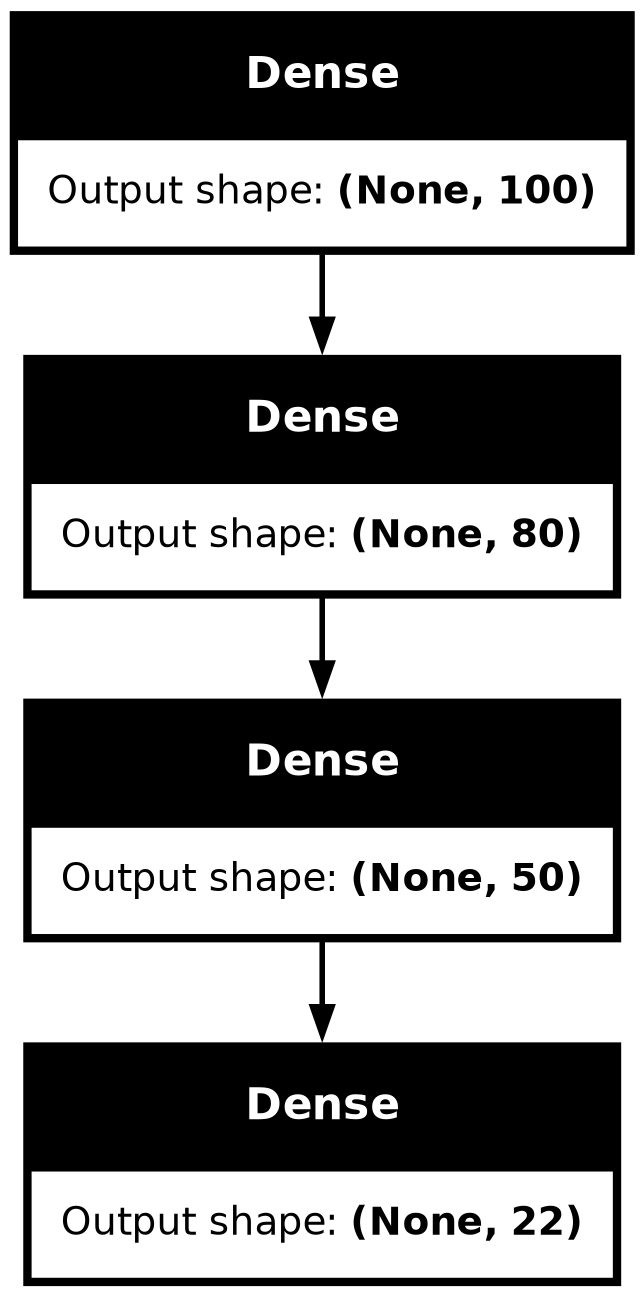

In [66]:
# architetcure of the MLP model

plot_model(model, show_shapes=True)

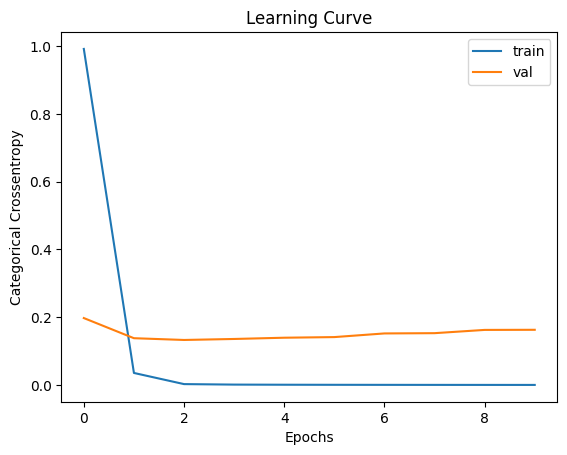

In [67]:
# creating loss vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

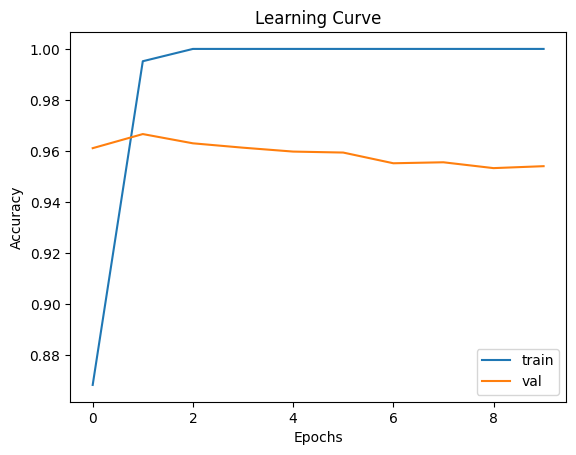

In [68]:
# creating accuracy vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [69]:
# evaluating the loss and accuracy of the model

loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy %.3f'%accuracy)

137/137 - 2s - 16ms/step - accuracy: 0.9591 - loss: 0.1314
Accuracy 0.959


In [70]:
# defining input variable
# vectorizing input varible 'clean_text' into a matrix 

x = data['clean_text']

cv = CountVectorizer() # ngram_range=(1,2)
x = cv.fit_transform(x)

# changing the datatype of the number into uint8 to consume less memory
x = x.astype('uint8') # uint8 and float32

In [71]:
# defining target variable

y = data['language_encoded']

In [72]:
# splitting data into training and testing datasets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [73]:
# converting csr matrix into np.ndarray supported by tensorflow

x_train = x_train.toarray()
x_test = x_test.toarray()

In [74]:
# shapes of the various datasets

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17487, 264258) (4372, 264258) (17487,) (4372,)


In [75]:
# input size hyperparameter

INPUT_SIZE = x_train.shape[1]
INPUT_SIZE

# outputsize hyperparatmeter

OUTPUT_SIZE = len(data['language_encoded'].unique())
OUTPUT_SIZE

22

In [76]:
BATCH_SIZE = 256
EPOCHS = 8

In [77]:
# configuring early stopping

es = EarlyStopping(monitor='accuracy', patience=1)

We create a Sequential model with activation function as softsign and intializer as glorot_uniform. Our Neural Network is 5 layers deep and 261254 layers wide.

It contains 3 hidden layers:

Hidden Layer 1 : 100 nodes
Hidden Layer 2 : 80 nodes
Hidden Layer 3 : 50 nodes
The output layer uses the Soft Max activation function which returns an array of lenght 22 contianing probablity of an element's index being the output.

In [78]:
# creating the MLP model

model = Sequential([
    Dense(100, activation='softsign', kernel_initializer='glorot_uniform', input_shape=(INPUT_SIZE,)),
    Dense(80, activation='softsign', kernel_initializer='glorot_uniform'),
    Dense(50, activation='softsign', kernel_initializer='glorot_uniform'),
    Dense(OUTPUT_SIZE, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
from keras.models import Sequential
from keras.layers import Input, Dense

model = Sequential([
    Input(shape=(INPUT_SIZE,)),  # Define the input shape using the Input layer
    Dense(100, activation='softsign', kernel_initializer='glorot_uniform'),
    Dense(80, activation='softsign', kernel_initializer='glorot_uniform'),
    Dense(50, activation='softsign', kernel_initializer='glorot_uniform'),
    Dense(OUTPUT_SIZE, activation='softmax')
])


In [80]:
# compiling the MLP model

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
# fitting the model with earlystopping callback to avoid overfitting 

hist = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.3, callbacks=[es], verbose=2)

Epoch 1/8


W0000 00:00:1712067686.454535      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712067689.806711      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712067693.865946      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


48/48 - 11s - 237ms/step - accuracy: 0.9204 - loss: 1.5818 - val_accuracy: 0.9579 - val_loss: 0.7287
Epoch 2/8


W0000 00:00:1712067694.855306      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


48/48 - 3s - 55ms/step - accuracy: 0.9940 - loss: 0.3435 - val_accuracy: 0.9663 - val_loss: 0.2929
Epoch 3/8
48/48 - 3s - 54ms/step - accuracy: 0.9986 - loss: 0.1051 - val_accuracy: 0.9689 - val_loss: 0.1895
Epoch 4/8
48/48 - 3s - 54ms/step - accuracy: 0.9998 - loss: 0.0512 - val_accuracy: 0.9706 - val_loss: 0.1552
Epoch 5/8
48/48 - 3s - 55ms/step - accuracy: 0.9998 - loss: 0.0320 - val_accuracy: 0.9705 - val_loss: 0.1387


In [82]:
# summary of the MLP model

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 100)            │    26,425,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 50)             │         4,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 22)             │         1,122 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,317,458 (302.57 MB)

 Trainable params: 26,439,152 (100.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,878,306 (201.71 MB)

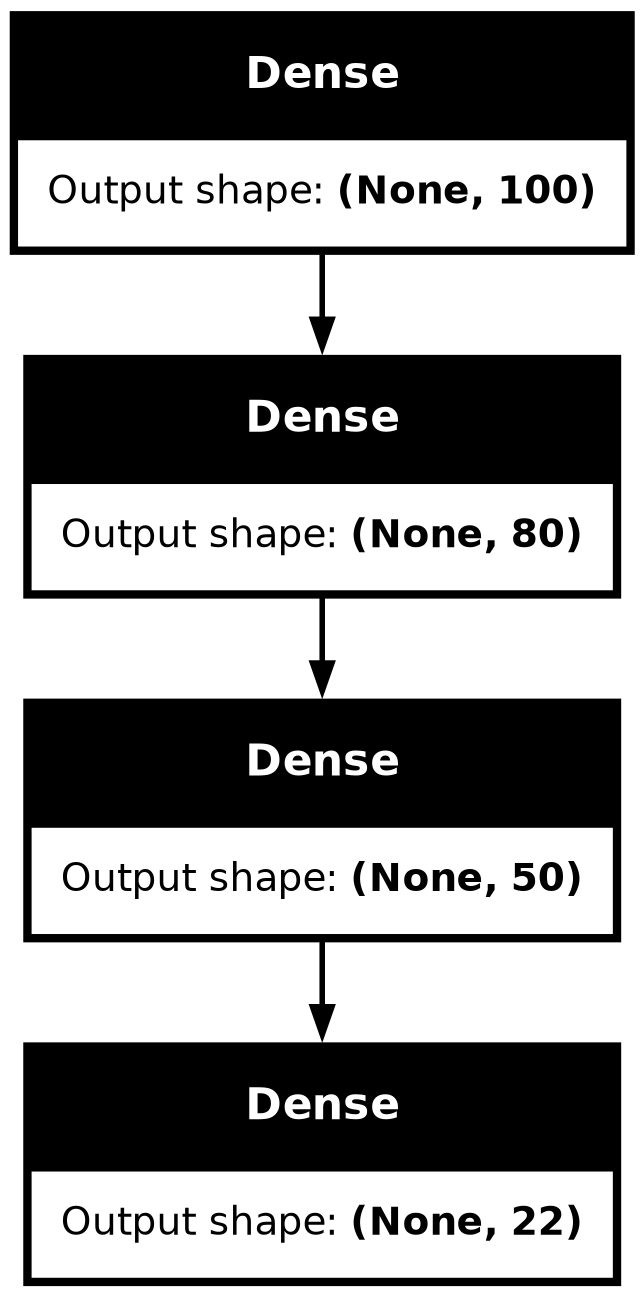

In [83]:
# architetcure of the MLP model

plot_model(model, show_shapes=True)

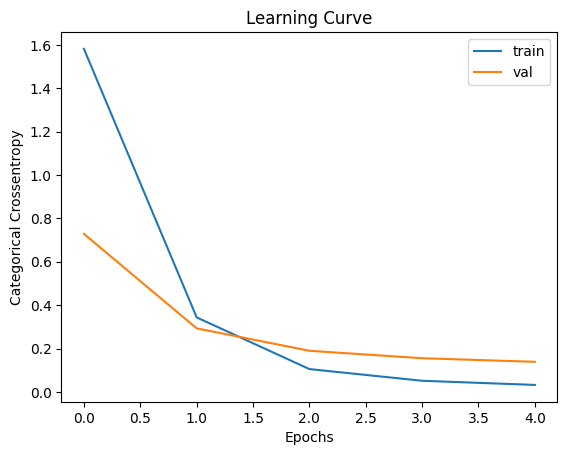

In [84]:
# creating loss vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

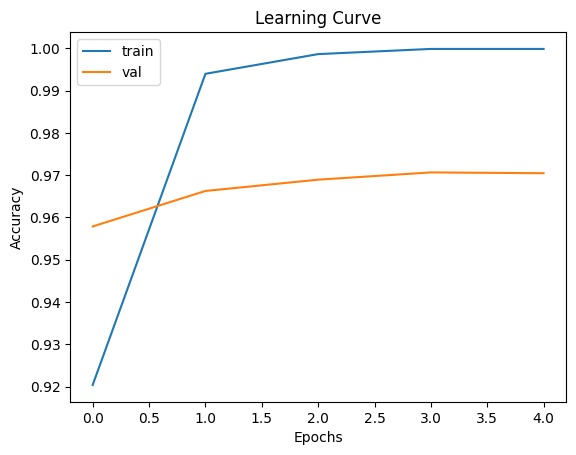

In [85]:
# creating accuracy vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [86]:
# evaluating the loss and accuracy of the model

loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy %.3f'%accuracy)

137/137 - 1s - 11ms/step - accuracy: 0.9639 - loss: 0.1430
Accuracy 0.964


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


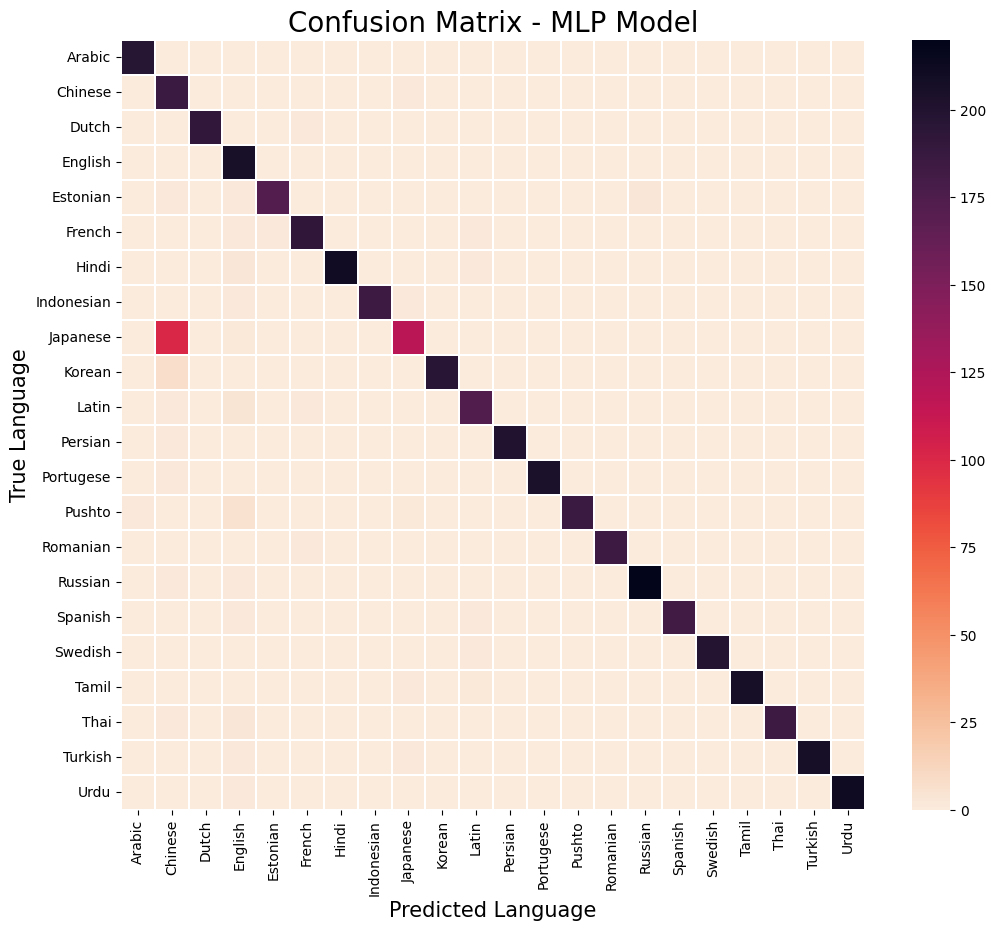

In [88]:
y_pred_prob = model.predict(x_test) # returns an array containing probability for each category being output
y_pred = []
for i in y_pred_prob:
    out = np.argmax(i) # taking the highest probability category as output
    y_pred.append(out)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_test, y_pred) # confusion matrix

# heat map of confusion matrix
plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - MLP Model', fontsize=20)
sns.heatmap(cm, xticklabels=lang_list, yticklabels=lang_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       197
           1       0.62      0.99      0.77       187
           2       1.00      0.99      1.00       192
           3       0.89      1.00      0.94       206
           4       0.99      0.97      0.98       177
           5       0.98      0.98      0.98       195
           6       1.00      0.98      0.99       214
           7       1.00      0.99      0.99       186
           8       0.95      0.54      0.69       221
           9       1.00      0.97      0.98       203
          10       0.97      0.97      0.97       180
          11       1.00      1.00      1.00       202
          12       1.00      1.00      1.00       205
          13       1.00      0.95      0.98       195
          14       1.00      0.99      1.00       186
          15       0.99      0.99      0.99       222
          16       1.00      0.99      0.99       184
          17       1.00    

In [90]:
# saving the model

model.save('language_identifcation_model.h5')

In [91]:
# loading the model

model = load_model('language_identifcation_model.h5')

In [94]:
# using the model for prediction

sent = """आप कितना सोचते हो
अगर आप ठिठुरती रातों को गिनें
अरे क्या आप मिल सकते हैं (अरे, क्या आप मिल सकते हैं?)
क्या तुम मिलोगे (क्या तुम मिलोगे?)
सर्दियों का अंत बताओ
एक कोमल वसंत के दिन तक
मैं चाहता हूं कि तुम तब तक रहो जब तक फूल खिल न जाएं
ज्यों का त्यों"""


sent = cv.transform([sent])
sent = sent.toarray()  
ans = model.predict(sent)
ans = np.argmax(ans)
le.inverse_transform([ans])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


array(['Hindi'], dtype=object)